In [1]:
import pandas as pd
from autoshap import SHAPPipeline

In [2]:
data_pdf = pd.read_csv('../data/example_dataset.csv')

In [3]:
data_pdf.head()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,target,dt
0,2.455507,0.515776,-2.496439,-0.128132,-1.040917,0.701222,1.095685,-0.309998,-0.113416,1,2019-08-08
1,1.527586,0.760085,-0.503598,-0.736635,1.079328,-1.346749,-0.411951,-1.234806,0.330508,0,2019-08-08
2,0.160180,0.978178,-0.777022,-0.264811,-0.755381,1.890936,-1.460008,0.807505,2.174213,1,2019-08-08
3,-2.434091,1.235270,0.543380,0.105468,-0.341755,0.652134,-0.858236,0.951028,1.325498,0,2019-08-08
4,2.477754,3.325458,-2.827196,1.597335,-3.051454,-1.509864,-0.269693,1.232371,0.811001,1,2019-08-08


In [4]:
ml_model_params = {
                "binary_output_feature":'target',
                "dt_begin":'2019-08-08',
                "dt_end":'2019-09-08',
                "train_samples":5000,
                "shap_calculate_samples":2000,
                "interaction":True,
                "tuning_params":{"learning_rate":[0.01,0.05,0.1],
                            "max_depth":[6,9,12],
                            "min_child_weight":[1,3,5]
                              },
                "path_to_data":"../data",
                "verbose":1
                  }

In [5]:
model = SHAPPipeline(ml_model_params)

In [9]:
%%time
#Pega o nome das features e cria um dataframe do pandas feito de um sampling pra que cada classe do output aparece cerca de 50% das vezes
feature_names, sampled_df = model.transform_dataset(df=data_pdf)

# Separa o dataset em X (valores das features), y (variável de saída) e dtrain(matrix usada pelo xgboost)
X, y, dtrain = model.set_data(feature_names, sampled_df)

# Encontra os melhores parâmetros
model.train()

# Treina um modelo com os melhores parâmetros
model.set_best_model()

# Calcula as predições do modelo
model.calc_predictions()

# Seleciona apenas os exemplos (corretos) que serão usadas para treinamento no shap
model.select_correct_predictions()

# Calcula os Shapley Values
shap_values = model.compute_shap_values()

# Cria um novo dataframe do pandas com apenas o número de amostras que será usado no treino do shap
model.build_shap_df()

In [10]:
%%time
shap_interaction_values = model.compute_shap_interaction_values()

CPU times: user 1min 26s, sys: 74.6 ms, total: 1min 26s
Wall time: 7.7 s


In [11]:
# Salva todos os dados
model.save_shap_data()

# Salva o melhor modelo
model.save_model()

# Faz o log do melhor modelo com suas métricas
model.best_model_log()

* Check log

In [9]:
!cat ../data/train_log_*

########################################
log from 2019-11-21
trained with          : <class 'xgboost.core.Booster'>
parameters            : {'max_depth': 12, 'min_child_weight': 1, 'learning_rate': 0.1}
train_samples         : 3302
shap_calculate_samples: 1000
data date             : 2019-08-08
classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1602
         1.0       1.00      1.00      1.00      1641

    accuracy                           1.00      3243
   macro avg       1.00      1.00      1.00      3243
weighted avg       1.00      1.00      1.00      3243




Loading data...
Building dataframes...
Making summary plots...


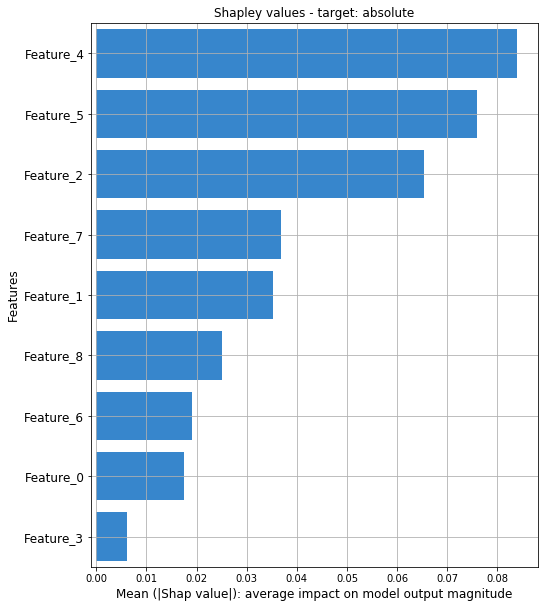

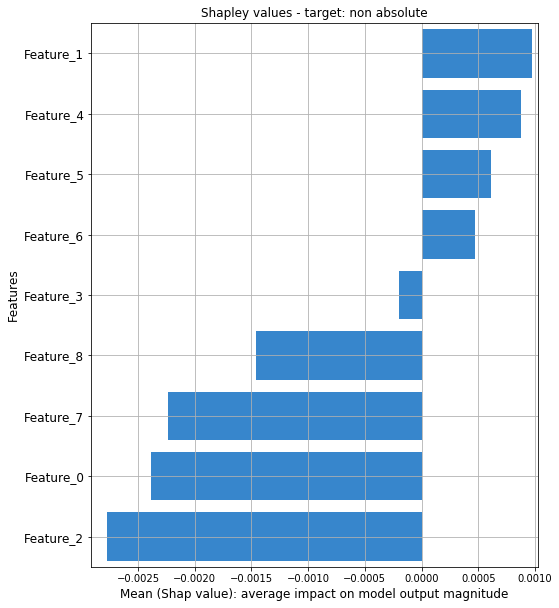

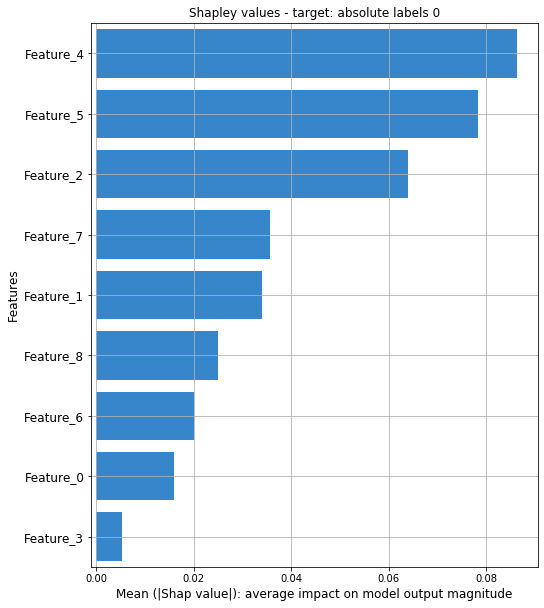

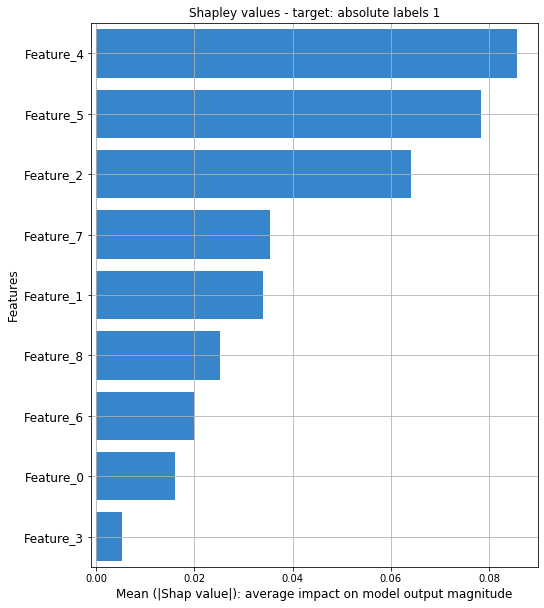

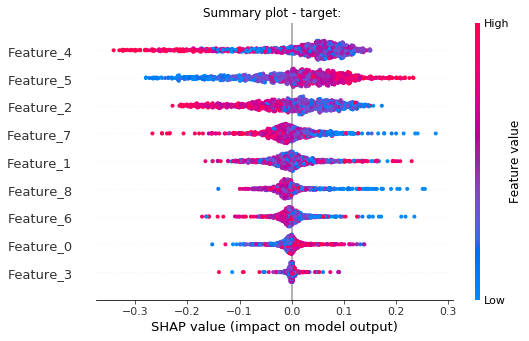

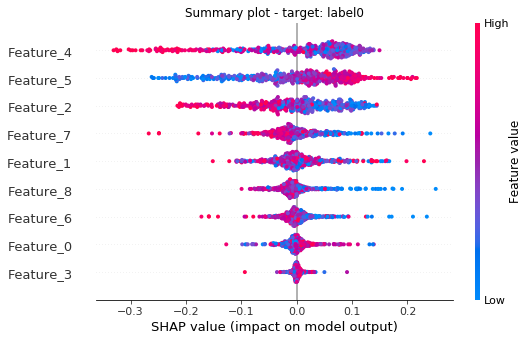

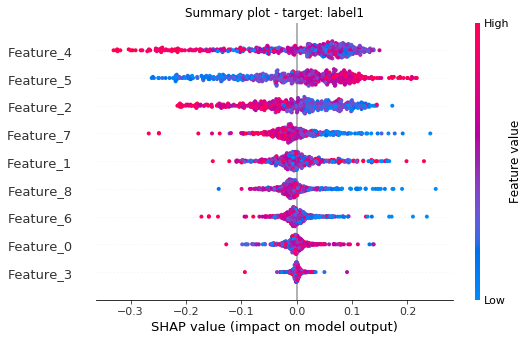

Making dependence plots...


<Figure size 432x288 with 0 Axes>

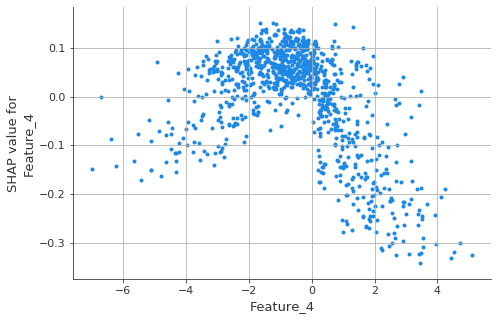

<Figure size 432x288 with 0 Axes>

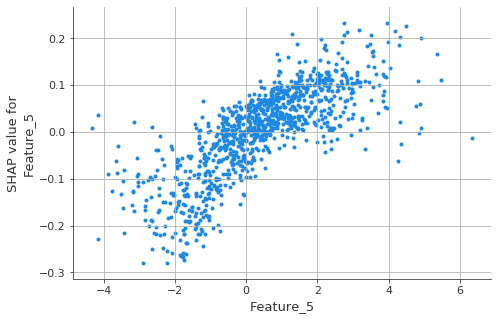

<Figure size 432x288 with 0 Axes>

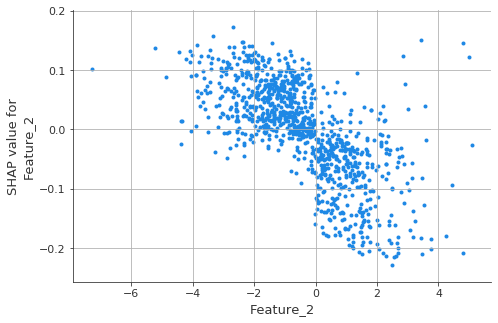

<Figure size 432x288 with 0 Axes>

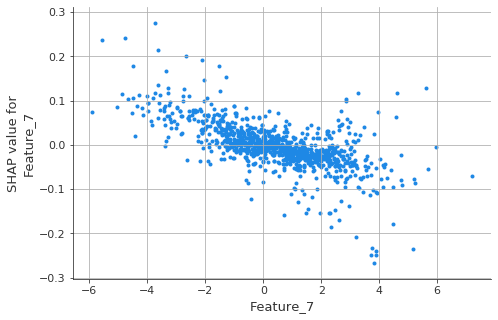

<Figure size 432x288 with 0 Axes>

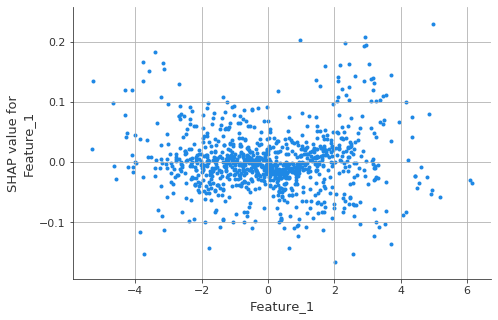

Making dependence interaction plots...


<Figure size 432x288 with 0 Axes>

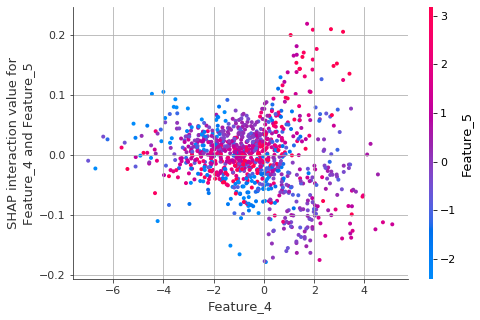

<Figure size 432x288 with 0 Axes>

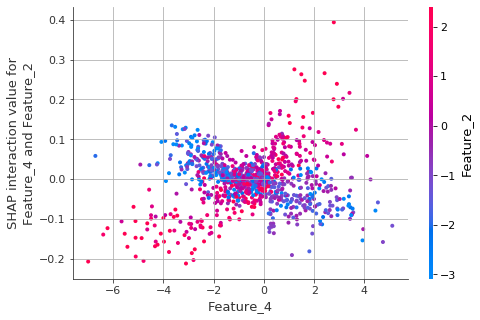

<Figure size 432x288 with 0 Axes>

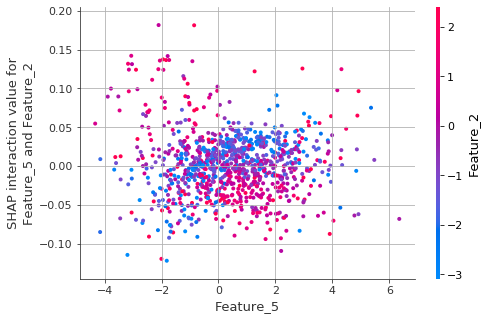

We are done!


In [12]:
# Carrega os dados salvos e gera os gráficos
model.make_summary(n_high_contribution_cols = 5, n_high_contribution_interaction_cols = 3,show_plots=True,max_display=9)